In [1]:
## housekeeping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## helper function returns a moving average for vector, window, stride
def MA(x, window, stride=1):
    n = len(x) # length of input 
    m = (n - window) // stride + 1 # length of output 
    MA = np.zeros(m) # initialize output 
    for i in range(m): # for each output element
            sum = 0 # initialize element sum
            for j in range(window): # for each input element in window
                sum += x[i * stride + j] # sum window
            MA[i] = sum / window # take average
    return MA

In [14]:
## function returns a moving variance for vector, window, stride
def MV(x, window, stride=1):
    n = len(x) # length of input 
    m = (n - window) // stride + 1 # length of output 
    sigma2_hat = np.zeros(m) # initialize output 
    mu_hat = MA(x, window, stride) # get moving average as estimator of mean
    for i in range(m): # for each output element
        sum = 0 # initialize element sum
        for j in range(window): # for each input element in window
            sum += (x[i * stride + j] - mu_hat[i])**2 # sum squared error
        sigma2_hat[i] = sum / window # take variance
    return sigma2_hat

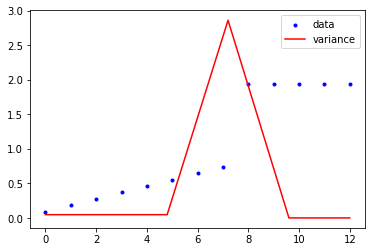

In [15]:
## test output
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 21, 21, 21, 21, 21]) # input
n = len(x) # length of input
window = 3 # window size
stride = 2 # stride length
m = (n - window) // stride + 1 # length of moving average
y = MV(x, window, stride) # moving average
plt.scatter(np.arange(n), x / np.mean(x), marker=".", color="blue") # plot data  
plt.plot(np.linspace(0, n-1, m), y / np.mean(y) / 2, color="red") # plot variance
plt.legend(["data", "variance"])
plt.show()